Мы прошли 4 темы  
Для себя я их разделил таким образом:  
1) Введение в обучение с подкреплением (RL):   
Базовые понятия RL  
Что такое траектория в RL  
MDP: Марковский процесс принятия решений  
POMDP: частично наблюдаемая версия  
Возврат и дисконтирование  
Политика, ценности и уравнения Беллмана (связка с MDP)  
Рекурсивная форма возврата  
2) Динамическое программирование (DP):  
Базовая постановка  
Политики и ценности  
Базовые определения  
Уравнения Беллмана и операторы  
Policy Evaluation  
Policy Improvement  
Policy Iteration  
Value Iteration  
Практические оговорки  
Ошибка оценки и сходимость  
Ошибка, нормы и критерии остановки  
Ошибка улучшения политики  
3) Монте-Карло и TD-обучение, MC-оценка, TD(0), bias-variance, n-step, eligibility traces (λ): 
Проблема предсказания  
Методы Монте-Карло (MC-оценка)  
Типы алгоритмов  
Характеристики MC  
Обучение по временным разностям (TD-обучение)  
Алгоритм (TD(0) — самый простой TD-метод)  
Bias–Variance Trade-of  
Объединение MC и TD: n-шаговое TD-обучение (n-step TD)  
Следы приемлемости (Eligibility Traces, TD(λ))  
Алгоритм TD(λ)  
Forward View vs Backward View  
4) Контроль в Обучении с Подкреплением: SARSA и Q-learning:  
Проблема предсказания  
Основы. Задача контроля и функции ценности  
SARSA – On-policy TD Control  
Алгоритм и формула обновления  
Q-learning – Oﬀ-policy TD Control  
Сравнение. On-policy vs. Oﬀ-policy (SARSA vs. Q-learning)  
Как поведут себя алгоритмы? (при использовании ε-greedy политики поведения)  
Стратегии исследования: ε-greedy и Softmax  
Softmax (или Boltzmann Exploration)  

Для каждой из них в цели практики и закрепления материала создал небольшие мини проекты.  
А в этом ноутбуке собрал все пройденное во что-то общее

Я старался сделать проект, который можно развивать дальше, когда пойдут темы вроде Deep Q-Networks (DQN), Policy Gradient, Actor-Critic и т.д.

Обучение агента управлению движением в среде FrozenLake с использованием методов TD (SARSA и Q-learning)

Я старался создать и обучить агента чтобы он принимал optimal решения в Stochastic среде FrozenLake-v1 (из OpenAI Gym) с использованием классических алгоритмов reinforcement learning:
SARSA (on-policy)
Q-learning (off-policy)
Я хотел сравнить поведение и эффективность 2 подходов по скорости сходимости, устойчивости и финал качеству политики

cреда: FrozenLake-v1 из open-ai gymnasium  
сетка 4×4 (или 8×8) S, F, H, G: старт, safe поверхность, дыра, цель  
4 dir: вверх, вниз, влево, вправо  
дыра: 0  
цель: вознаграждение 1

cостояние s  
действие a  
политика π(a∣s)  
func ценности действия: Q(s,a) = E [Rt	∣ st = s, at = a]  
вознаграждение: rt  
coef дисконтирования: γ∈[0,1]  

SARSA (On-policy) Q(s,a) ← Q(s,a) + α [r + γ*Q(s′ ,a′) − Q(s,a)]  
ε-greedy  
Q-learning (Off-policy)  Q(s,a) ← Q(s,a) + α [r + γ * a′max​Q(s′,a′) − Q(s,a)]

как мы знаем, SARSA (On-policy) осторожный, Q-learning (Off-policy) быстрее, но не стабильный

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [3]:
# среда
env = gym.make("FrozenLake-v1", is_slippery=True)
n_states = env.observation_space.n
n_actions = env.action_space.n

In [5]:
# гиперпараметры
alpha = 0.1
gamma = 0.99
epsilon = 0.1
episodes = 10000

In [6]:
# инициализация таблиц
Q_sarsa = np.zeros((n_states, n_actions))
Q_qlearning = np.zeros((n_states, n_actions))

In [7]:
def epsilon_greedy(Q, state):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[state, :])

In [8]:
def run_episode_SARSA(Q):
    state, _ = env.reset()
    action = epsilon_greedy(Q, state)
    total_reward = 0

    while True:
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_action = epsilon_greedy(Q, next_state)

        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

        state, action = next_state, next_action
        total_reward += reward

        if terminated or truncated:
            break

    return total_reward

In [9]:
def run_episode_Qlearning(Q):
    state, _ = env.reset()
    total_reward = 0

    while True:
        action = epsilon_greedy(Q, state)
        next_state, reward, terminated, truncated, _ = env.step(action)

        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state
        total_reward += reward

        if terminated or truncated:
            break

    return total_reward

In [10]:
# обучение
rewards_sarsa, rewards_qlearning = [], []

for ep in range(episodes):
    rewards_sarsa.append(run_episode_SARSA(Q_sarsa))
    rewards_qlearning.append(run_episode_Qlearning(Q_qlearning))


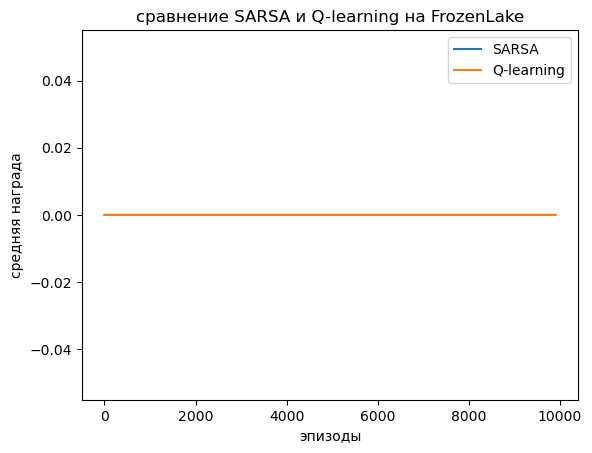

In [11]:
plt.plot(np.convolve(rewards_sarsa, np.ones(100)/100, mode='valid'), label='SARSA')
plt.plot(np.convolve(rewards_qlearning, np.ones(100)/100, mode='valid'), label='Q-learning')
plt.xlabel('эпизоды')
plt.ylabel('средняя награда')
plt.legend()
plt.title('сравнение SARSA и Q-learning на FrozenLake')
plt.show()

Why?  
потому что:
is_slippery=True,
ε-greedy политика фиксирована (ε=0.1)  
вознаграждение только за цель (1), а иначе 0  
событие очень редкое при random действиях и low ε

Training Q-learning: 100%|██████████| 5000/5000 [00:00<00:00, 16659.96it/s]


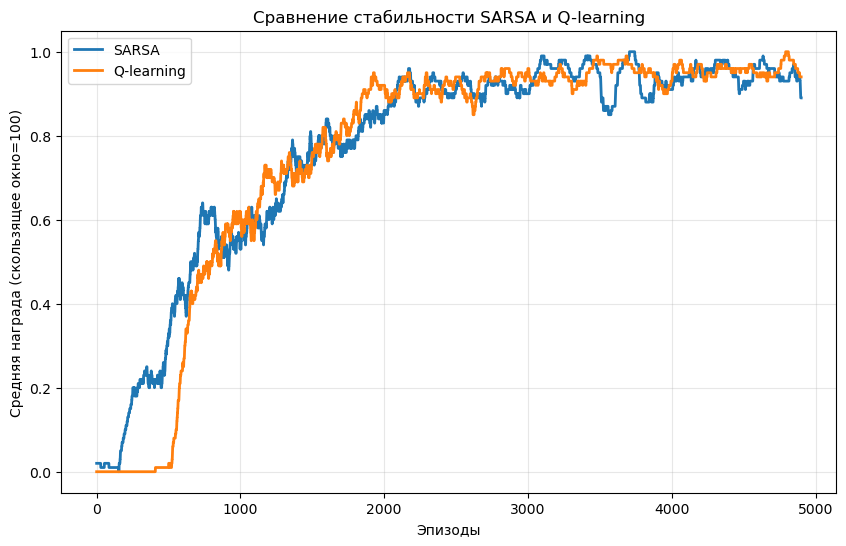


=== РЕЗУЛЬТАТЫ ===
SARSA успехов: 0.0%
Q-learning успехов: 100.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from tqdm import tqdm


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from tqdm import tqdm

In [14]:
# среда
env = gym.make("FrozenLake-v1", is_slippery=False)  
# слипкая карта true
# детерминированная false
n_actions = env.action_space.n
n_states = env.observation_space.n

In [15]:
# гиперпараметры 
episodes = 5000
alpha = 0.1
gamma = 0.99
epsilon_start = 1.0
epsilon_end = 0.05
epsilon_decay = 0.999

In [16]:
# func выбора действия ε-greedy
def choose_action(state, q_table, epsilon):
    if np.random.random() < epsilon:
        return env.action_space.sample()
    return np.argmax(q_table[state])

In [17]:
# SARSA 
def train_sarsa():
    q = np.zeros((n_states, n_actions))
    rewards = []
    epsilon = epsilon_start

    for ep in tqdm(range(episodes), desc="Training SARSA"):
        state, _ = env.reset()
        action = choose_action(state, q, epsilon)
        total_reward = 0

        while True:
            next_state, reward, done, truncated, _ = env.step(action)
            next_action = choose_action(next_state, q, epsilon)

            q[state, action] += alpha * (
                reward + gamma * q[next_state, next_action] - q[state, action]
            )

            state, action = next_state, next_action
            total_reward += reward
            if done or truncated:
                break

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        rewards.append(total_reward)

    return q, rewards

In [18]:
# Q-Learning
def train_qlearning():
    q = np.zeros((n_states, n_actions))
    rewards = []
    epsilon = epsilon_start

    for ep in tqdm(range(episodes), desc="Training Q-learning"):
        state, _ = env.reset()
        total_reward = 0

        while True:
            action = choose_action(state, q, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)

            q[state, action] += alpha * (
                reward + gamma * np.max(q[next_state]) - q[state, action]
            )

            state = next_state
            total_reward += reward
            if done or truncated:
                break

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        rewards.append(total_reward)

    return q, rewards

In [19]:
# сравнение
q_sarsa, rewards_sarsa = train_sarsa()
q_qlearn, rewards_qlearn = train_qlearning()

Training Q-learning: 100%|██████████| 5000/5000 [00:00<00:00, 17353.46it/s]


In [20]:
# скользящее avg для smooth graph
def smooth(y, window=100):
    return np.convolve(y, np.ones(window)/window, mode='valid')

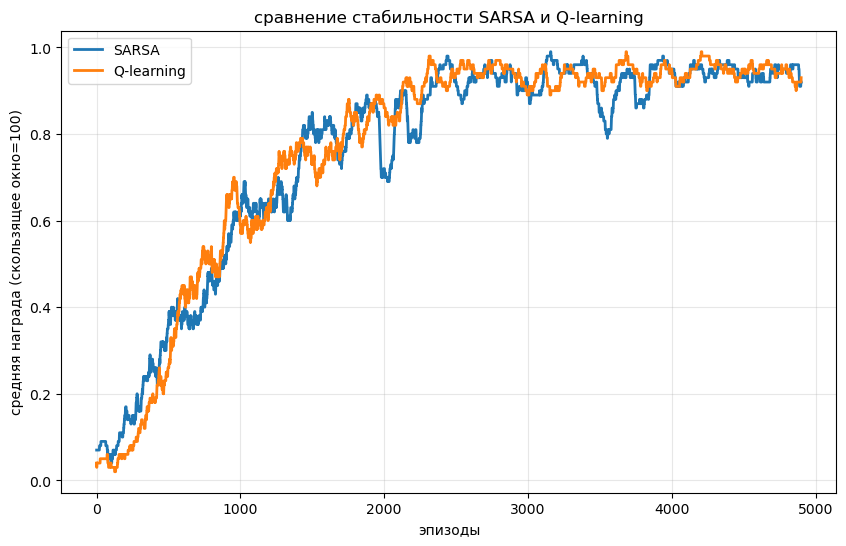

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(smooth(rewards_sarsa), label="SARSA", linewidth=2)
plt.plot(smooth(rewards_qlearn), label="Q-learning", linewidth=2)
plt.title("сравнение стабильности SARSA и Q-learning")
plt.xlabel("эпизоды")
plt.ylabel("средняя награда (скользящее окно=100)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()